In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import seaborn as sns
import re
import datetime
# import rarfile
# import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import geopandas as gpd
# import pysal
import geoplot
import osmnx
import folium

In [3]:
#Importing SANRAL the data
all_cars_agg = pd.read_csv('/../edsa-traffic/SANRAL/all_cars_agg.csv')
all_cars_agg.head()

,Unnamed: 0,vehicle,Unnamed: 0.1,time,gantry,class,start_gantry,duration,same_vehicle_flag,distance,...,velocity_max,velocity_std,hour_max,hour_min,hour_mean,hour_std,distance_max,distance_min,distance_mean,distance_std
0,0,2.0,450450,2014-10-01 07:29:10,1021,2,1021,NaN,True,NaN,...,80.880573,NaN,14.370370,12.259259,13.314815,12.259259,8.947407,6.964074,8.008119,NaN
1,1,4.0,2363285,2014-10-01 19:04:03,1008,2,1008,NaN,True,NaN,...,83.166892,NaN,14.666667,13.000000,13.833333,13.000000,9.595185,6.132963,7.802634,NaN
2,2,6.0,2618973,2014-10-01 11:06:00,1044,3,1032,NaN,True,NaN,...,80.385138,NaN,13.185185,10.666667,11.925926,10.666667,9.292593,5.928148,7.526190,NaN
3,3,12.0,822719,2014-10-01 10:02:23,1008,2,1008,NaN,True,NaN,...,97.674825,NaN,14.185185,10.777778,12.481481,10.777778,10.486296,6.355556,8.122230,NaN
4,4,21.0,2187613,2014-10-01 18:06:45,1003,2,1002,NaN,True,NaN,...,97.525108,NaN,13.814815,8.740741,11.277778,8.740741,10.420741,6.329630,8.304617,NaN


In [4]:
gantry_locations = pd.read_csv('/../edsa-traffic/SANRAL/gantry_locations.csv')
gantry_locations.head()

,Gantry,Gantry Name,Route,Latitude,Longitude,GantryN
0,1001,Barbet,N1,-25.7562,28.2744,1001
1,1002,Mossie,N1,-25.8194,28.2534,1002
2,1003,Indlazi,N1,-25.8443,28.2303,1003
3,1004,Pikoko,N1,-25.8732,28.1798,1004
4,1005,Ivusi,N1,-25.8978,28.1632,1005


In [5]:
df_agg_counts = pd.read_csv('/../edsa-traffic/SANRAL/df_agg_counts.csv')
df_agg_counts.head()

,gantry,time,time1,count
0,1001,1,0,211
1,1001,1,1,183
2,1001,1,2,153
3,1001,1,3,183
4,1001,1,4,380


In [6]:
cars_cols = ['vehicle', 'Unnamed: 0', 'distance','velocity_min','velocity_max', 'Unnamed: 0.1',
             'velocity_std', 'hour_min','hour_std', 'distance_max', 'distance_min','distance_std', "same_vehicle_flag"]
all_cars_agg.drop(cars_cols,axis=1,inplace=True)

In [7]:
# add the name associated with gantry
mapping = dict(gantry_locations[['Gantry','Gantry Name']].values)
all_cars_agg['gantry_name'] = all_cars_agg.gantry.map(mapping)

# add the Latitude associated with gantry
mapping = dict(gantry_locations[['Gantry','Latitude']].values)
all_cars_agg['Latitude'] = all_cars_agg.gantry.map(mapping)

# add the Longitude associated with gantry
mapping = dict(gantry_locations[['Gantry','Longitude']].values)
all_cars_agg['Longitude'] = all_cars_agg.gantry.map(mapping)

# add the count associated with gantry
mapping = dict(df_agg_counts[['gantry','count']].values)
all_cars_agg['vehicle_count'] = all_cars_agg.gantry.map(mapping)

# add the route associated with gantry
mapping = dict(gantry_locations[['Gantry','Route']].values)
all_cars_agg['route'] = all_cars_agg.gantry.map(mapping)
all_cars_agg.head()

,time,gantry,class,start_gantry,duration,velocity,hour,velocity_mean,hour_max,hour_mean,distance_mean,gantry_name,Latitude,Longitude,vehicle_count,route
0,2014-10-01 07:29:10,1021,2,1021,NaN,1.581972,7,72.310135,14.370370,13.314815,8.008119,Kwikkie,-26.1524,28.1322,318,N3
1,2014-10-01 19:04:03,1008,2,1008,NaN,1.040171,19,63.792628,14.666667,13.833333,7.802634,Sunbird,-26.0365,28.1075,368,N1
2,2014-10-01 11:06:00,1044,3,1032,NaN,55.942446,11,58.798236,13.185185,11.925926,7.526190,Weaver,-26.1627,28.2272,129,R21
3,2014-10-01 10:02:23,1008,2,1008,NaN,1.609318,10,79.815129,14.185185,12.481481,8.122230,Sunbird,-26.0365,28.1075,368,N1
4,2014-10-01 18:06:45,1003,2,1002,NaN,2.301399,18,72.962751,13.814815,11.277778,8.304617,Indlazi,-25.8443,28.2303,276,N1


In [8]:
all_cars_agg['duration'] = all_cars_agg['hour_mean'] 
c_cols = ['distance_mean', 'hour_mean', 'hour_max', 'velocity_mean', 'velocity']

all_cars_agg['speed'] = all_cars_agg['hour']*all_cars_agg['velocity']

all_cars_agg['distance'] = all_cars_agg['hour']*all_cars_agg['speed']

all_cars_agg.drop(c_cols,axis=1,inplace=True)
all_cars_agg.head()

,time,gantry,class,start_gantry,duration,hour,gantry_name,Latitude,Longitude,vehicle_count,route,speed,distance
0,2014-10-01 07:29:10,1021,2,1021,13.314815,7,Kwikkie,-26.1524,28.1322,318,N3,11.073803,77.516620
1,2014-10-01 19:04:03,1008,2,1008,13.833333,19,Sunbird,-26.0365,28.1075,368,N1,19.763258,375.501911
2,2014-10-01 11:06:00,1044,3,1032,11.925926,11,Weaver,-26.1627,28.2272,129,R21,615.366906,6769.035971
3,2014-10-01 10:02:23,1008,2,1008,12.481481,10,Sunbird,-26.0365,28.1075,368,N1,16.093184,160.931843
4,2014-10-01 18:06:45,1003,2,1002,11.277778,18,Indlazi,-25.8443,28.2303,276,N1,41.425182,745.653267


In [9]:
df = gantry_locations[['Latitude', 'Longitude']]
df.head()

,Latitude,Longitude
0,-25.7562,28.2744
1,-25.8194,28.2534
2,-25.8443,28.2303
3,-25.8732,28.1798
4,-25.8978,28.1632


In [10]:
df1 = gantry_locations[['Gantry Name']]
df1.head()

,Gantry Name
0,Barbet
1,Mossie
2,Indlazi
3,Pikoko
4,Ivusi


In [11]:
df.values[0:2]

array([[-25.7562,  28.2744],
       [-25.8194,  28.2534]])

In [12]:

# visualise gantry locations
m = folium.Map(location=df.values[0],
                   zoom_start=9, control_scale=True, prefer_canvas=True)
# folium.PolyLine(df.values).add_to(m)
for i in range(0, len(df)):
    folium.Marker(df.values[i], popup=df1['Gantry Name'].values[i]).add_to(m)
m

- gantry speed

In [13]:
df2 = all_cars_agg
df3 = df2[df2['gantry_name']  != 'Kwikkie'][['Latitude', 'Longitude']]
df3.head()

,Latitude,Longitude
0,-26.1524,28.1322
1,-26.0365,28.1075
2,-26.1627,28.2272
3,-26.0365,28.1075
4,-25.8443,28.2303


In [14]:
df3 = df2[(df2['gantry_name'])  == 'Bee-eater'][['Latitude', 'Longitude']]
df3.head()

,Latitude,Longitude


In [15]:
from folium import plugins
from folium.plugins import HeatMap


hmap = folium.Map(location=df.values[-1],
                    zoom_start = 10, control_scale = True) 
for i in range(0, len(df)):
    folium.Marker(df.values[i], popup=df1['Gantry Name'].values[i]).add_to(hmap)

df2 = all_cars_agg
df3 = df2[(df2['duration'])  > (np.mean(df2['duration'])*4)][['Latitude', 'Longitude']]
df4 = df2[(df2['duration'])  > (np.mean(df2['duration'])*4)][['gantry_name']]

heat_data = df3.values
# Plot it on the map
hmap.add_child(HeatMap(heat_data, radius = 15, gradient={.4: 'lime', .65: 'yellow', 1: 'red'}))


# Display the map
hmap

- Gantry clusters

In [16]:
map2 = folium.Map(location=df.values[0], 
                 zoom_start=9, control_scale=True, prefer_canvas=True)

marker_cluster = plugins.MarkerCluster().add_to(map2)

for i in range(0, len(df)):
    folium.Marker(df.values[i], popup=df1['Gantry Name'].values[i]).add_to(marker_cluster)
map2

- find/draw best posible route

In [17]:
map3 = folium.Map(location=df.values[0],
                   zoom_start=9, control_scale=True, tiles = "Stamen Toner",prefer_canvas=True) 
from folium import plugins

# Adds tool to the top right
from folium.plugins import MeasureControl
map3.add_child(MeasureControl())

for i in range(0, len(df)):
#     folium.Marker(df.values[i], popup=df1['Gantry Name'].values[i], icon=folium.Icon(color='red')).add_to(map3)
    folium.CircleMarker(df.values[i], popup=df1['Gantry Name'].values[i],
                    radius=10,
                    color='red',
                    ).add_to(map3)

df2 = all_cars_agg
df3 = df2[(df2['speed'])  > (np.mean(df2['speed'])*4)][['Latitude', 'Longitude']]
df4 = df2[(df2['speed'])  > (np.mean(df2['speed'])*4)][['gantry_name']]

heat_data = df3.values
map3.add_child(HeatMap(heat_data, radius = 15, gradient={.4: 'lime', .65: 'yellow', 1: 'red'}))

# Fairly obvious I imagine - works best with transparent backgrounds
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map3)

map3

In [18]:
map3 = folium.Map(location=df.values[0],
                   zoom_start=9, control_scale=True,prefer_canvas=True) 
from folium import plugins

# Adds tool to the top right
from folium.plugins import MeasureControl
map3.add_child(MeasureControl())

for i in range(0, len(df)):
#     folium.Marker(df.values[i], popup=df1['Gantry Name'].values[i], icon=folium.Icon(color='red')).add_to(map3)
    folium.CircleMarker(df.values[i], popup=df1['Gantry Name'].values[i],
                    radius=10,
                    color='red',
                    ).add_to(map3)

df2 = all_cars_agg
df3 = df2[(df2['speed'])  > (np.mean(df2['speed'])*4)][['Latitude', 'Longitude']]
df4 = df2[(df2['speed'])  > (np.mean(df2['speed'])*4)][['gantry_name']]

heat_data = df3.values
map3.add_child(HeatMap(heat_data, radius = 15, gradient={.4: 'lime', .65: 'yellow', 1: 'red'}))

folium.PolyLine(df.values[41:43].tolist()).add_to(map3)

map3

In [19]:
all_cars_agg['actual_time'] = pd.to_datetime(all_cars_agg['time']).dt.time
all_cars_agg.head()

,time,gantry,class,start_gantry,duration,hour,gantry_name,Latitude,Longitude,vehicle_count,route,speed,distance,actual_time
0,2014-10-01 07:29:10,1021,2,1021,13.314815,7,Kwikkie,-26.1524,28.1322,318,N3,11.073803,77.516620,07:29:10
1,2014-10-01 19:04:03,1008,2,1008,13.833333,19,Sunbird,-26.0365,28.1075,368,N1,19.763258,375.501911,19:04:03
2,2014-10-01 11:06:00,1044,3,1032,11.925926,11,Weaver,-26.1627,28.2272,129,R21,615.366906,6769.035971,11:06:00
3,2014-10-01 10:02:23,1008,2,1008,12.481481,10,Sunbird,-26.0365,28.1075,368,N1,16.093184,160.931843,10:02:23
4,2014-10-01 18:06:45,1003,2,1002,11.277778,18,Indlazi,-25.8443,28.2303,276,N1,41.425182,745.653267,18:06:45


In [20]:
from folium.plugins import TimestampedGeoJson

In [21]:
from datetime import datetime
date_format ="%Y-%m-%dT%H:%M:%S" 

df1 = all_cars_agg[['Latitude', 'Longitude']]
# df2 = all_cars_agg['time'].apply(lambda x:datetime.strptime(x, date_format))

# all_cars_agg['time'] = pd.to_datetime(all_cars_agg['time'])
# df2 = all_cars_agg['time'].dt.strftime(date_format)
df2 = all_cars_agg['time']
df2.head()


0    2014-10-01 07:29:10
1    2014-10-01 19:04:03
2    2014-10-01 11:06:00
3    2014-10-01 10:02:23
4    2014-10-01 18:06:45
Name: time, dtype: object

In [22]:
df1.values[0]

array([-26.1524,  28.1322])

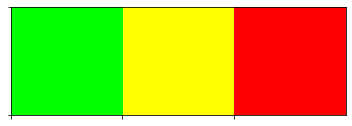

In [23]:
color_scale = np.array(['lime','yellow','red'])
sns.palplot(sns.color_palette(color_scale), size=2)

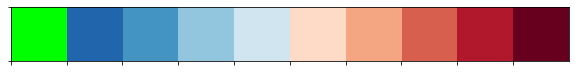

In [24]:
color_scale = np.array(['lime','#2166ac','#4393c3','#92c5de','#d1e5f0','#fddbc7','#f4a582','#d6604d','#b2182b','#67001f'])
sns.palplot(sns.color_palette(color_scale))

In [25]:
df2.values[0:5].ravel().tolist()


['2014-10-01 07:29:10',
 '2014-10-01 19:04:03',
 '2014-10-01 11:06:00',
 '2014-10-01 10:02:23',
 '2014-10-01 18:06:45']

In [26]:
df2 = all_cars_agg.groupby(['hour','Latitude', 'Longitude'])[['speed']].mean()
df2.head()

speed
hour Latitude Longitude       
0    -26.2695 28.0494      0.0
     -26.2681 27.9499      0.0
     -26.2667 28.0731      0.0
     -26.2626 27.9756      0.0
     -26.2587 28.1145      0.0

In [27]:
map3 = folium.Map(location=df.values[0],
                   zoom_start=10, control_scale=True,prefer_canvas=True) 
from folium import plugins

# Adds tool to the top right
from folium.plugins import MeasureControl
map3.add_child(MeasureControl())

for i in range(0, len(df)):
#     folium.Marker(df.values[i], popup=df1['Gantry Name'].values[i], icon=folium.Icon(color='red')).add_to(map3)
    folium.CircleMarker(df.values[i],
                    radius=10,
                    color='green',
                    ).add_to(map3)

df2 = all_cars_agg
df3 = df2[(df2['hour'])  == 6 ][['Latitude', 'Longitude']]

heat_data = df3.values
map3.add_child(HeatMap(heat_data, radius = 15, gradient={.4: 'lime', .65: 'yellow', 1: 'red'}))

from folium.features import DivIcon

folium.map.Marker(
    df.values[0],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 24pt">Hour: 6</div>',
        )
    ).add_to(map3)


map3

https://towardsdatascience.com/visualizing-air-pollution-with-folium-maps-4ce1a1880677

In [28]:
df1.values[0].tolist()

[-26.1524, 28.1322]

In [30]:
# m = folium.Map(
#     location=df1.values[0].tolist(),
#     zoom_start=9
# )


# # Lon, Lat order.
# Points = [
#     {
#         'coordinates': df1.values[:10].tolist(),
#         'dates':df2.values[:10].ravel().tolist(),
# #         'color': 'red'
#     },
    
# ]

# features = [
#     {
#         'type': 'Feature',
#         'geometry': {
#             'type': 'Point',
#             'coordinates': Point['coordinates'],
#         },
#         'properties': {
#             'times': Point['dates'],
#             'style': {
# #                 'color': Point['color']
# #                 'weight': Points['weight'] if 'weight' in line else 5
#             }
#         }
#     }
#     for Point in Points
# ]

# plugins.TimestampedGeoJson({
#     'type': 'FeatureCollection',
#     'features': features,
# }, period='PT1M', add_last_point=True).add_to(m)

# m